# PARTE 1

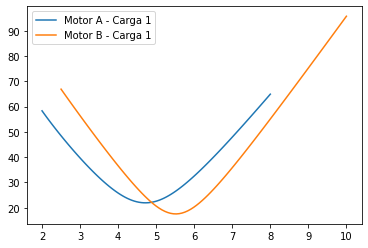

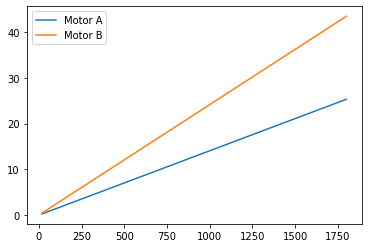

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

motores = {
    "A": {
        "vt": 208,
        "p_nom": 45 * 746,
        "lig": "d",
        "fp": 0.8,
        "tipo_fp": "cap",
        "if_nom": 4,
        "n": .8173,
        "xs": 2.5,
        "polos": 4,
        "f": 60
    },
    "B": {
        "vt": 250,
        "p_nom": 60 * 746,
        "lig": "d",
        "fp": 0.85,
        "tipo_fp": "cap",
        "if_nom": 5,
        "n": .85,
        "xs": 2.2,
        "polos": 4,
        "f": 60
    }
}

cargas = {
    "1": {
        "p": 15 * 746,
        "fp": .85,
        "tipo_fp": "ind"
    }
}

fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()

# Cálculo EA para a carga
for tag in motores:
    for tag2 in cargas:
        carga = cargas[tag2]
        motor = motores[tag]

        ia = (carga["p"]/motor["n"])/(3*motor["vt"]*carga["fp"])
        ang = -1 * math.acos(carga["fp"]) if carga["tipo_fp"] == "ind" else math.acos(carga["fp"])
        ea = motor["vt"] - 1j * motor["xs"] * cmath.rect(ia, ang)

        # Determinando a curva V
        if_v = np.linspace(motor["if_nom"]/2, 2*motor["if_nom"], 100)
        k_v = abs(ea) / motor["if_nom"]
        ea_v_mod = if_v * k_v
        ea_ang_v = np.array([math.asin(abs(ea)*math.sin(cmath.phase(ea))/x) for x in ea_v_mod])

        ea_v = []

        for i in range(len(ea_v_mod)):
            mod = ea_v_mod[i]
            ang = ea_ang_v[i]
            ea_v.append(cmath.rect(mod, ang))

        ea_v = np.array(ea_v)

        ia_v = (motor["vt"] - ea_v) / (1j * motor["xs"])

        ax.plot(if_v, abs(ia_v), label="Motor {} - Carga {}".format(tag, tag2))
        ax.legend()
       
    # Determinando a curva de potência
    delta = np.linspace(0.01,1, 100)
    wm = 120*motor["f"]/motor["polos"]
    
    t_max = (3 * motor["vt"] * ea) / (wm * 1j * motor["xs"]) * delta
    
    ax2.plot(delta*wm, abs(t_max), label="Motor {}".format(tag))
    ax2.legend()

plt.show()

# Parte 2

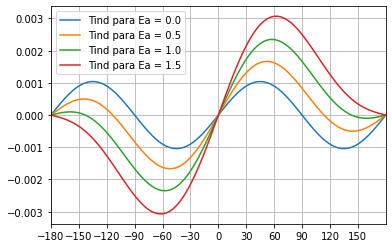

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

s_base = 50e6
v_base = 11e3

motor = {
    "s_nom": 50e6,
    "v_nom": 11e3,
    "x_d": 0.8,
    "x_q": 0.4,
    "perdas": 0.15,
    "f": 60,
    "polos": 4
}

eas = np.linspace(0,1.5,4)
deltas = np.linspace(-math.pi, math.pi, 100)


fig, ax = plt.subplots()

for ea in eas:
    wm = 120 * motor["f"] / motor["polos"]
    vt = motor["v_nom"] / v_base
    xd = motor["x_d"]
    xq = motor["x_q"]
    t_ind = ((3 * vt * ea) / wm) * np.array([math.sin(x) for x in deltas]) \
        + (3 * math.pow(vt,2) / (2 * wm)) * ((xd-xq)/(xd*xq)) * np.array([math.sin(2*x) for x in deltas])
    x = np.array([math.degrees(d) for d in deltas])
    ax.plot(x, t_ind, label="Tind para Ea = {}".format(ea))
    
ax.set(xlim=(-180, 180), xticks=np.arange(-180,180,30))
ax.grid()
    
ax.legend()    
plt.show()

# Parte 3

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

s_base = 50e6
v_base = 11e3

motor = {
    "s_nom": 50e6,
    "v_nom": 11e3,
    "x_d": 0.8,
    "x_q": 0.4,
    "perdas": 0.15,
    "f": 60,
    "polos": 4
}

cargas = {
    "A": {
        "tipo": "ind",
        "fp": 0.8
    },
    "B": {
        "tipo": "cap",
        "fp": 0.8
    }
}

for tag in cargas:
    wm = 120 * motor["f"] / motor["polos"]
    carga = cargas[tag]
    ia = 1 #carga nominal 1pu
    ang = math.acos(0.8)
    ang *= -1 if carga["tipo"] == "ind" else 1
    vt = motor["v_nom"] / v_base
    xq = motor["x_q"]
    xd = motor["x_d"]
    
    ea_aux = vt + 1j * xq * cmath.rect(ia, ang)
    ang_aux = cmath.phase(ea_aux)
    
    i_d = ia * math.sin(ang + ang_aux)
    i_q = ia * math.cos(ang + ang_aux)
    
    i_d = cmath.rect(i_d, ang_aux - math.pi)
    i_q = cmath.rect(i_q, ang_aux)
    
    ea = vt + 1j * xd * i_d + 1j * xq * i_q
    
    t_rel = 3 * math.pow(vt,2) / (2*wm) * (xd-xq)/(xd*xq)*math.sin(2*cmath.phase(ea))
    t_exc = 3 * vt * abs(ea) * math.sin(cmath.phase(ea)) / (wm*xd)
    
    print("Para a carga {} com fator de potência {} {} temos:".format(tag,carga["fp"],carga["tipo"]))
    print("Ea = {:.2f} pu fase {:.2f}º".format(abs(ea),math.degrees(cmath.phase(ea))))
    print("Torque de relutância: {:.2e}".format(t_rel))
    print("Torque de excitação: {:.2e} \n".format(t_exc))

Para a carga A com fator de potência 0.8 ind temos:
Ea = 1.06 pu fase 38.16º
Torque de relutância: 1.01e-03
Torque de excitação: 1.36e-03 

Para a carga B com fator de potência 0.8 cap temos:
Ea = 1.27 pu fase -20.75º
Torque de relutância: -6.90e-04
Torque de excitação: -9.39e-04 

